**Title of ML project: Heat Demand Analysis**

—----------------------------------------------------------------------------------------------------------

**Name:** Swapna Joseph

**Organization:** Entri Elevate

**Date:** 25-09-2024

—--------------------------------------------------------------------------------------------------------

1. **Overview of Problem Statement:**


The dataset provides an extensive overview of energy consumption across various industries, highlighting fuel types, temperatures, and emissions for facilities across different locations in the U.S.Nowadays pollutiom has been increased exceding all the limits and the main reason for this is considered to be as the fuel combustion.The fuel combustion increases the heat in the atmosphere and thereby increasing the atmospheric temparature and pollution.The ultimate goal is to provide actionable insights that can inform decision-making in industrial energy management and environmental sustainability.Therefore, developing an effective prediction model can aid in proactive management and heat reduction methods.


2. **Objective:**


The primary objective of this project is to develop a machine learning model capable of accurately predicting key industrial metrics based on historical data related to fuel types, facility characteristics, and environmental factors. 

Specifically, the project aims to:

1. Predict the Total Heat Demand for industrial processes using various input features such as fuel type, facility type, and temperature conditions. This will enable better planning and optimization of energy resources in industrial settings.

2. Analyze CO2 Emissions (MMTCO2E) associated with different industrial processes to provide insights into the environmental impact and help identify potential areas for reducing carbon footprint.

3. **Data Description:**

 - Source: [https://data.world/us-doe-gov/4bcb6731-a1d7-4126-9802-aa7165eb8281] - Features:
CITY: Name of the city.
COUNTY: Name of the county.
COUNTY_FIPS: FIPS code for the county.
Coal: Quantity of coal used.
Diesel: Quantity of diesel used.
END_USE: Type of energy end-use (e.g., CHP and/or Cogeneration Process).
FACILITY_ID: Identifier for the facility.
FINAL_NAICS_CODE: NAICS code of the industry.
FUEL_TYPE: Type of fuel used.
Natural_gas: Quantity of natural gas used.
STATE: State abbreviation.
Temp_degC: Temperature in degrees Celsius.
Total: Total energy consumption.
UNIT_NAME: Name of the energy unit.
UNIT_TYPE: Type of energy unit (e.g., OCS - Other combustion source).
MMTCO2E: CO2 emissions in metric tons.


4. **Data Collection:**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("industry-heat-demand-characterization.csv",encoding='latin1')
df.head()

,Unnamed: 0,CITY,COUNTY,COUNTY_FIPS,Coal,Diesel,END_USE,FACILITY_ID,FINAL_NAICS_CODE,FUEL_TYPE,...,Residual_fuel_oil,STATE,Temp_degC,Total,UNIT_NAME,UNIT_TYPE,for_EU_sum,Temp_Band,Biogenic,MMTCO2E
0,0,SPARROWS POINT,Baltimore,24005,0.0,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),...,0.0,MD,1100.0,328.280712,Pennwood Boiler #1,"OB (Boiler, other)",True,>400°C,False,0.016527
1,1,SPARROWS POINT,Baltimore,24005,0.0,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),...,0.0,MD,1100.0,666.678118,Pennwood Boiler #2,"OB (Boiler, other)",True,>400°C,False,0.033563
2,2,SPARROWS POINT,Baltimore,24005,0.0,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),...,0.0,MD,1100.0,172.814781,Pennwood Boiler #3,"OB (Boiler, other)",True,>400°C,False,0.008700
3,3,SPARROWS POINT,Baltimore,24005,0.0,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),...,0.0,MD,1100.0,2925.987834,CP-NG Combustion Sources,OCS (Other combustion source),True,>400°C,False,0.147303
4,4,SPARROWS POINT,Baltimore,24005,0.0,0.0,Process Heating,1000553,331111,Natural Gas (Weighted U.S. Average),...,0.0,MD,1100.0,318.073057,Pennwood Boiler #4,"OB (Boiler, other)",True,>400°C,False,0.016013


In [10]:
df.describe()

,Unnamed: 0,COUNTY_FIPS,Coal,Diesel,FACILITY_ID,FINAL_NAICS_CODE,LPG_NGL,MECS_NAICS,Natural_gas,Other,REPORTING_YEAR,Residual_fuel_oil,Temp_degC,Total,MMTCO2E
count,94934.000000,94934.000000,94934.000000,94934.000000,9.493400e+04,94934.000000,94934.000000,94934.000000,94934.000000,94934.000000,94934.000000,94934.000000,94934.000000,94934.000000,94934.000000
mean,47466.500000,31376.307350,30.775075,0.391728,1.004572e+06,322941.925475,0.589451,322941.925475,144.764544,171.182860,2012.484463,0.740376,402.483736,348.320017,0.022463
std,27405.229565,17321.101029,319.330590,9.646340,2.643697e+03,8442.648302,30.281009,8442.648302,815.523928,936.857930,1.698252,18.598223,283.775752,1255.379861,0.083167
min,0.000000,0.000000,0.000000,0.000000,1.000022e+06,212391.000000,0.000000,212391.000000,0.000000,0.000000,2010.000000,0.000000,50.000000,0.000000,0.000000
25%,23733.250000,18089.000000,0.000000,0.000000,1.002272e+06,322121.000000,0.000000,322121.000000,0.000000,0.000000,2011.000000,0.000000,200.000000,0.030798,0.000002
50%,47466.500000,31079.000000,0.000000,0.000000,1.004901e+06,322130.000000,0.000000,322130.000000,0.000000,0.000000,2012.000000,0.000000,260.000000,19.028854,0.001120
75%,71199.750000,48141.000000,0.000000,0.000000,1.006788e+06,324110.000000,0.000000,324110.000000,25.046065,0.056020,2014.000000,0.000000,600.000000,209.649928,0.011983
max,94933.000000,78010.000000,13139.027027,1484.648188,1.012089e+06,331111.000000,3924.191715,331111.000000,25017.508481,40186.755182,2015.000000,1706.857566,1500.000000,40186.755182,3.308042


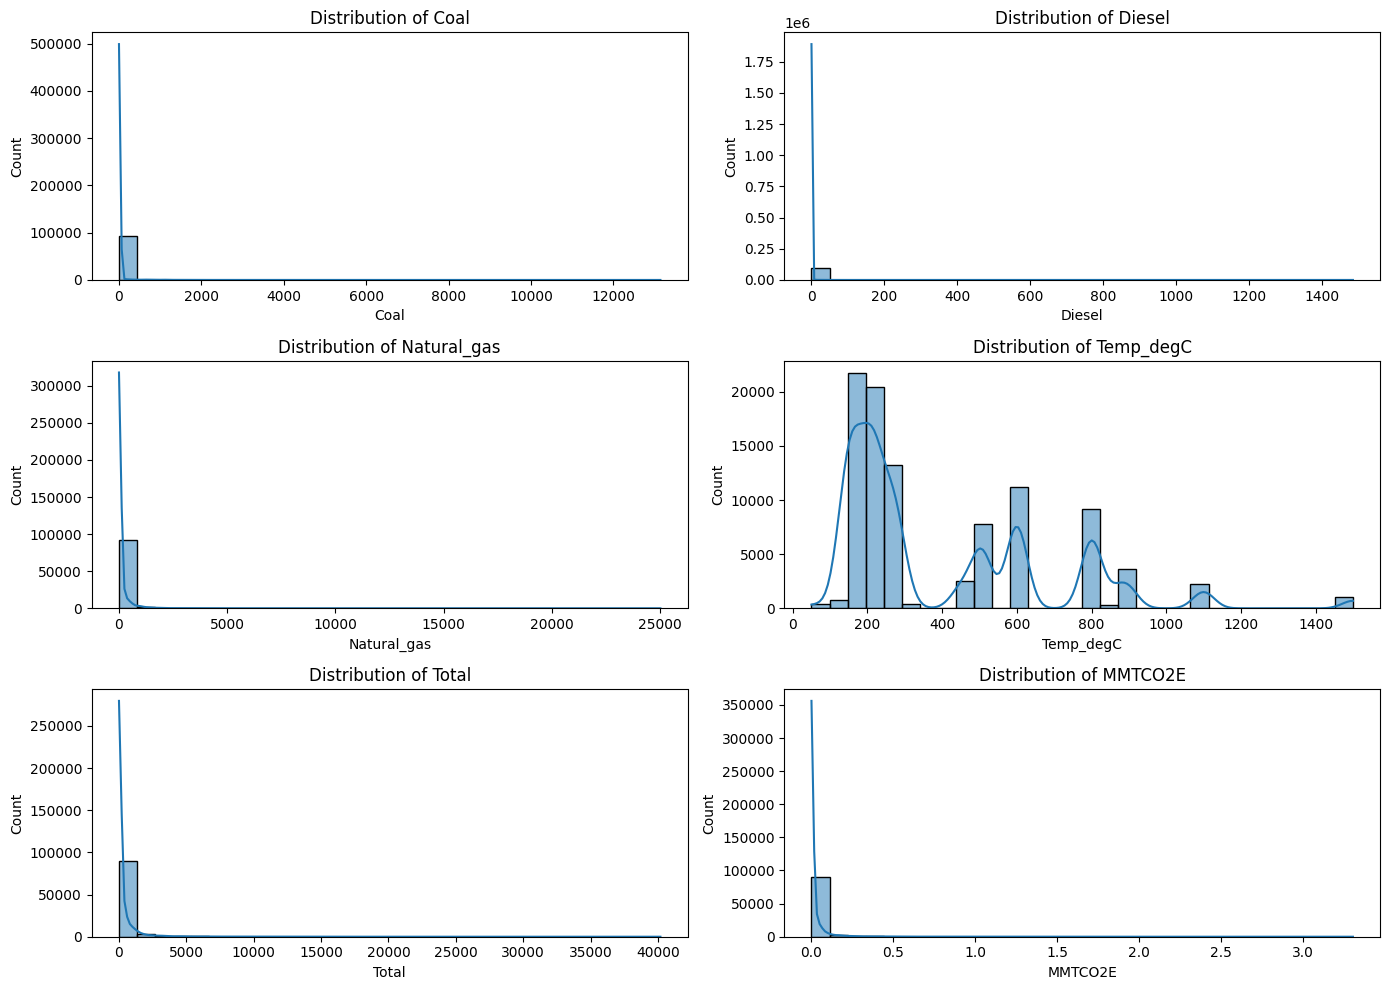

In [18]:
# List of numerical columns to plot
numerical_columns = ['Coal', 'Diesel', 'Natural_gas', 'Temp_degC', 'Total', 'MMTCO2E']

# Plotting distributions using histograms
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

***Skewness:*** All the histograms except distribution of temparature is right-skewed (positively skewed). Most of the data points are concentrated on the left side, with a long tail extending to the right. This indicates that lower values of natural gas are more frequent, while higher values are less common..

***Interpretation:*** Right skewness often suggests that there are a few high-value outliers in the dataset. In practical terms, this could mean that while most observations have low natural gas values, there are some instances with significantly higher values.


***Skewness:*** The histogram of temparature does not show clear skewness but rather a multimodal distribution. There are multiple peaks, indicating that there are several ranges of temperature that occur frequently..

***Interpretation:*** A multimodal distribution suggests that the data might come from different sources or processes.

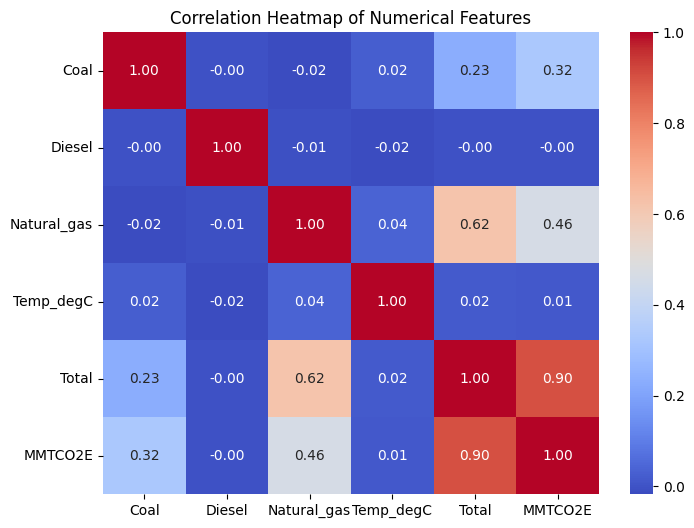

In [16]:
# Plot a heatmap of correlations
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Insights**

***1. High Correlation Between Total and MMTCO2E:***

There is a strong positive correlation (0.90) between Total and MMTCO2E. This suggests that as the total energy demand increases, the CO2 emissions (MMTCO2E) also tend to increase proportionally. This could be due to the fact that higher energy demands lead to greater fuel consumption, which in turn produces more emissions.

***2. Moderate Correlation Between Natural_gas and Total:***

Natural_gas shows a moderate positive correlation (0.62) with Total, meaning that the use of natural gas contributes significantly to the total energy demand. Natural gas is likely an important factor in determining the overall energy usage.

***3.Moderate Correlation Between Natural_gas and MMTCO2E:***

There is a moderate positive correlation (0.46) between Natural_gas and MMTCO2E. This implies that as natural gas usage increases, CO2 emissions also rise, though not as strongly as with total energy demand. This could indicate that natural gas is a cleaner fuel source compared to others like coal but still contributes to emissions.

***4.Low Correlations with Diesel:***

Diesel seems to have almost no significant correlation with other variables. Its correlation with Total, MMTCO2E, and other fuel types is very close to zero. This suggests that diesel use may not be a major factor in total energy consumption or emissions in this dataset.

***5.Weak Correlation Between Coal and MMTCO2E:***

There is a weak positive correlation (0.32) between Coal and MMTCO2E, indicating that coal usage contributes to CO2 emissions but not as significantly as other sources like natural gas or overall energy demand.

***6.Insignificant Correlation with Temp_degC:***

Temp_degC (Temperature in degrees Celsius) has almost no significant correlation with the other variables in this dataset. This implies that temperature might not have a direct relationship with energy consumption or emissions in this case.

**Summary of Insights:**

Total and MMTCO2E are very closely related, suggesting that overall energy demand is a strong driver of CO2 emissions.
Natural_gas plays an important role in both total energy consumption and emissions, making it a key variable for managing energy use and environmental impact.
Diesel and Temp_degC have minimal correlations with other variables, indicating that they may not be major factors in energy demand or emissions in this dataset.

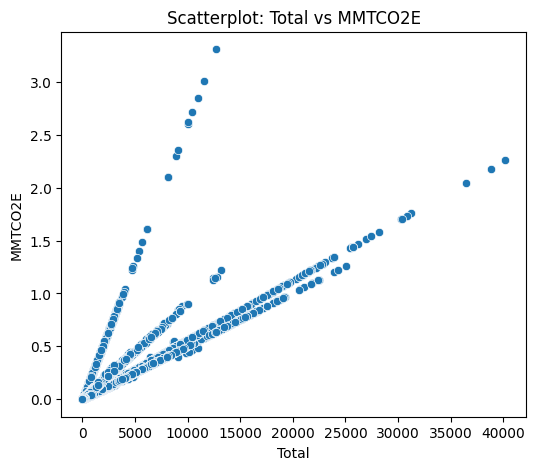

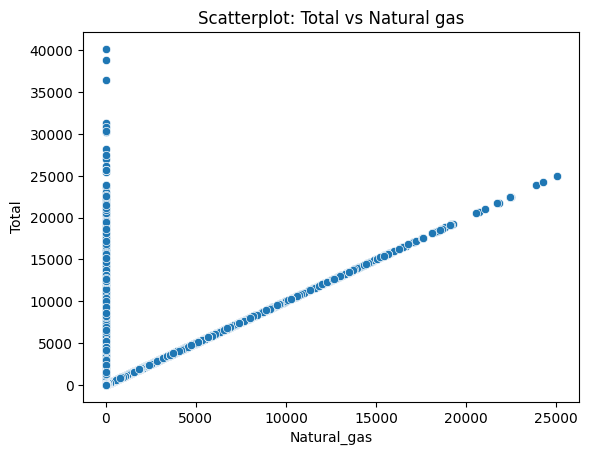

In [17]:
# Example scatterplot between Total and MMTCO2E
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Total', y='MMTCO2E', data=df)
plt.title('Scatterplot: Total vs MMTCO2E')
plt.show()
sns.scatterplot(x='Natural_gas', y='Total', data=df)
plt.title('Scatterplot: Total vs Natural gas')
plt.show()

***Observations on scatterplot total vs MMTCO2E***

Positive Correlation: The scatter plot shows a positive correlation between the “Total” and “MMTCO2E” values. As the “Total” increases, the “MMTCO2E” also tends to increase
.
Concentration of Points: There is a higher concentration of points near the origin (0,0), which gradually spreads outwards and upwards. This indicates that lower “Total” values are more frequent, but as “Total” increases, “MMTCO2E” also increases, though less frequently.

***Interpretation***

Trend: The upward trajectory of the points suggests that there is a relationship between the two variables. Specifically, higher “Total” values are associated with higher “MMTCO2E” values
.
Strength of Relationship: The scatter plot visually indicates the strength of the relationship. If the points were more tightly clustered along a straight line, the correlation would be stronger. Here, the spread of points suggests a moderate positive correlation.

***Observations on scatterplot total vs natural gas***

Positive Correlation: The scatter plot shows a clear positive correlation between “Natural_gas” and “Total.” As the amount of natural gas increases, the “Total” value also tends to increase
.
Concentration of Points: There is a higher concentration of points at lower values of both “Natural_gas” and “Total,” which gradually spreads out as the values increase. This suggests that lower values are more frequent, but as the values increase, they do so together.

***Interpretation***

Trend: The upward trend of the points indicates that there is a relationship between the two variables. Specifically, higher amounts of natural gas are associated with higher “Total” values
.
Strength of Relationship: The scatter plot visually indicates a strong positive correlation. The points are relatively close to a straight line, suggesting a consistent relationship across the data.

5. **Data Preprocessing - Data Cleaning:**

In [6]:
df.shape

(94934, 29)

In [7]:
df.size

2753086

In [8]:
df.columns

Index(['Unnamed: 0', 'CITY', 'COUNTY', 'COUNTY_FIPS', 'Coal', 'Diesel',
       'END_USE', 'FACILITY_ID', 'FINAL_NAICS_CODE', 'FUEL_TYPE',
       'FUEL_TYPE_BLEND', 'FUEL_TYPE_OTHER', 'LPG_NGL', 'MECS_NAICS',
       'Natural_gas', 'Other', 'Process_byp', 'Pulp_Paper', 'REPORTING_YEAR',
       'Residual_fuel_oil', 'STATE', 'Temp_degC', 'Total', 'UNIT_NAME',
       'UNIT_TYPE', 'for_EU_sum', 'Temp_Band', 'Biogenic', 'MMTCO2E'],
      dtype='object')

In [10]:
df.tail()

,Unnamed: 0,CITY,COUNTY,COUNTY_FIPS,Coal,Diesel,END_USE,FACILITY_ID,FINAL_NAICS_CODE,FUEL_TYPE,...,Residual_fuel_oil,STATE,Temp_degC,Total,UNIT_NAME,UNIT_TYPE,for_EU_sum,Temp_Band,Biogenic,MMTCO2E
94929,94929,VALLIANT,MCCURTAIN,40089,0.000000,0.0,Process Heating,1006776,322130,Coke,...,0.0,OK,800.0,0.000000,Lime Kiln (EUG E7),0,True,>400°C,False,0.000000
94930,94930,VALLIANT,MCCURTAIN,40089,0.000000,0.0,Process Heating,1006776,322130,Coke,...,0.0,OK,800.0,0.000000,Lime Kiln (EUG E7),0,True,>400°C,False,0.000000
94931,94931,VALLIANT,MCCURTAIN,40089,0.000000,0.0,Process Heating,1006776,322130,Coke,...,0.0,OK,800.0,0.000000,Lime Kiln (EUG E7),0,True,>400°C,False,0.000000
94932,94932,ARKANSAS CITY,DESHA,5041,0.000000,0.0,Process Heating,1002708,322130,Coke,...,0.0,AR,800.0,0.000000,#1 Lime Kiln,0,True,>400°C,False,0.000000
94933,94933,TOMAHAWK,LINCOLN,55069,1491.175997,0.0,Process Heating,1003884,322130,Bituminous,...,0.0,WI,800.0,1491.175997,B28,CF (Cyclone Furnace),True,>400°C,False,0.132901


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94934 entries, 0 to 94933
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         94934 non-null  int64  
 1   CITY               94934 non-null  object 
 2   COUNTY             94934 non-null  object 
 3   COUNTY_FIPS        94934 non-null  int64  
 4   Coal               94934 non-null  float64
 5   Diesel             94934 non-null  float64
 6   END_USE            94934 non-null  object 
 7   FACILITY_ID        94934 non-null  int64  
 8   FINAL_NAICS_CODE   94934 non-null  int64  
 9   FUEL_TYPE          94934 non-null  object 
 10  FUEL_TYPE_BLEND    94934 non-null  object 
 11  FUEL_TYPE_OTHER    94934 non-null  object 
 12  LPG_NGL            94934 non-null  float64
 13  MECS_NAICS         94934 non-null  int64  
 14  Natural_gas        94934 non-null  float64
 15  Other              94934 non-null  float64
 16  Process_byp        949

1. There are no missing values in this dataset.So no need of using imputation techniques.

2. Checking for and removing outliers using statistical methods.

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

# --- Z-score Method for Outlier Detection ---
# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
print(z_scores)

# Define a threshold for Z-scores (usually 3)
threshold = 3


       Unnamed: 0  COUNTY_FIPS      Coal    Diesel  FACILITY_ID  \
0        1.732033     0.425570  0.096374  0.040609     1.520405   
1        1.731996     0.425570  0.096374  0.040609     1.520405   
2        1.731960     0.425570  0.096374  0.040609     1.520405   
3        1.731923     0.425570  0.096374  0.040609     1.520405   
4        1.731887     0.425570  0.096374  0.040609     1.520405   
...           ...          ...       ...       ...          ...   
94929    1.731887     0.503013  0.096374  0.040609     0.833508   
94930    1.731923     0.503013  0.096374  0.040609     0.833508   
94931    1.731960     0.503013  0.096374  0.040609     0.833508   
94932    1.731996     1.520426  0.096374  0.040609     0.705254   
94933    1.732033     1.367859  4.573344  0.040609     0.260420   

       FINAL_NAICS_CODE   LPG_NGL  MECS_NAICS  Natural_gas     Other  \
0              0.967601  0.019466    0.967601     0.225030  0.182721   
1              0.967601  0.019466    0.967601     0

In [4]:
# Identify rows where Z-scores are greater than the threshold
outliers_z = (z_scores > threshold).any(axis=1)
print(outliers_z)

0        False
1        False
2        False
3         True
4        False
         ...  
94929    False
94930    False
94931    False
94932    False
94933     True
Length: 94934, dtype: bool


In [12]:
# Remove rows that contain outliers based on Z-scores
df_no_outliers_z = df[~outliers_z]

In [15]:
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers (Z-score method): {df_no_outliers_z.shape}")
df_1 = df_no_outliers_z

Original dataset shape: (94934, 29)
Dataset shape after removing outliers (Z-score method): (90198, 29)


In [16]:
from scipy.stats import boxcox

# Function to check skewness of numerical features
def check_skewness(df_1):
    skewness = df_1.select_dtypes(include=[np.number]).skew()
    skewed_columns = skewness[abs(skewness) > 0.5].index
    return skewed_columns, skewness

# Identify skewed numerical columns
skewed_columns, skewness_values = check_skewness(df_1)
print("Skewed columns and their skewness values:")
print(skewness_values[skewed_columns])


Skewed columns and their skewness values:
Coal                 12.175263
Diesel               16.050570
LPG_NGL              42.024142
Natural_gas           4.904026
Other                 4.656929
Residual_fuel_oil    16.898027
Temp_degC             0.922431
Total                 3.282708
MMTCO2E               4.032447
dtype: float64


In [ ]:
# Apply transformations
df_transformed = df_1.copy()

# Apply log transformation for positive values only
for col in skewed_columns:
    if (df_1[col] > 0).all():  # Log transformation only works for positive values
        df_transformed[col] = np.log1p(df_1[col])
    else:
        # Handle negative values by shifting them before log transformation
        df_transformed[col] = np.log1p(df_1[col] - df_1[col].min() + 1)

# Apply square root transformation (non-negative data)
for col in skewed_columns:
    df_transformed[col] = np.sqrt(df_transformed[col])

# Apply Box-Cox transformation (only works for strictly positive data)
for col in skewed_columns:
    if (df_1[col] > 0).all():  # Box-Cox requires positive values
        df_transformed[col], _ = boxcox(df_transformed[col])


# Plot histograms before and after transformations
def plot_transformations(df_1, df_transformed, skewed_columns):
    plt.figure(figsize=(10, 6))
    for i, col in enumerate(skewed_columns):
        plt.subplot(2, len(skewed_columns), i+1)
        sns.histplot(df_1[col], kde=True, color='blue')
        plt.title(f'Original {col}')

        plt.subplot(2, len(skewed_columns), i+1+len(skewed_columns))
        sns.histplot(df_transformed[col], kde=True, color='green')
        plt.title(f'Transformed {col}')
    plt.tight_layout()
    plt.show()

# Plot the transformations
plot_transformations(df_1, df_transformed, skewed_columns)

C:\Users\user\AppData\Local\Temp\ipykernel_14752\1416798020.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
